In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Mushroom Observer Data


In [69]:
df = pd.read_csv("datasets/observations_mushroom.csv")

# show info
display(df.shape)

/tmp/ipykernel_218870/3106922822.py:1: DtypeWarning: Columns (2,5,25,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/observations_mushroom.csv")


(647623, 33)

In [53]:
print(f"There are {df.shape[0]} images")
print(f"There are {len(df.label.unique())} unique labeled images")
print(f"There are {len(df['gbif_info/genus'].unique())} unique Genus")
print(f"There are {len(df['gbif_info/species'].unique())} unique Species")

There are 647623 images
There are 11999 unique labeled images
There are 1930 unique Genus
There are 8896 unique Species


# Data Analysis and Filtering

The database has a 648.934 images what makes it imposible to compute all those images in a personal computer. We would like to find a way to reduce this database and improve the quality of the selection. 

We found interesting to run all images through a simple VGG16 classification to obtain an english class for each image. 

In [45]:
df = pd.read_csv("datasets/observations_mushroom_prediction.csv", index_col="id")
df.head()

/tmp/ipykernel_218870/645870503.py:1: DtypeWarning: Columns (3,6,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


image_lien  image_id observation               label   
id                                                        
0       1.jpg         1           1  Xylaria polymorpha  \
1       2.jpg         2           2   Xylaria magnoliae   
2       3.jpg         3           3   Xylaria hypoxylon   
3       4.jpg         4           4   Xylaria hypoxylon   
4       5.jpg         5           5        Xeromphalina   

                                   image_url user                 date   
id                                                                       
0   http://mushroomobserver.org/images/320/1    1  2006-05-21 07:17:05  \
1   http://mushroomobserver.org/images/320/2    1  2006-05-21 07:17:06   
2   http://mushroomobserver.org/images/320/3    1  2006-05-21 07:17:08   
3   http://mushroomobserver.org/images/320/4    1  2006-05-21 07:17:10   
4   http://mushroomobserver.org/images/320/5    1  2006-05-21 07:17:12   

   gbif_info/kingdom gbif_info/family  gbif_info/speciesKey  ...   
id                                                           ...   
0              Fungi      Xylariaceae             5255104.0  ...  \
1              Fungi      Xylariaceae             3461845.0  ...   
2              Fungi      Xylariaceae             8631710.0  ...   
3              Fungi      Xylariaceae             8631710.0  ...   
4              Fungi       Mycenaceae                   NaN  ...   

                  gbif_info/scientificName gbif_info/genus  gbif_info/order   
id                                                                            
0   Xylaria polymorpha (Pers.) Grev., 1824         Xylaria       Xylariales  \
1      Xylaria magnoliae J.D. Rogers, 1979         Xylaria       Xylariales   
2       Xylaria hypoxylon (L.) Grev., 1824         Xylaria       Xylariales   
3       Xylaria hypoxylon (L.) Grev., 1824         Xylaria       Xylariales   
4              Xeromphalina Kühner & Maire    Xeromphalina       Agaricales   

   thumbnail  location  gbif_info/note gbif_info  file_exists   
id                                                              
0          1     214.0             NaN       NaN         True  \
1          1      53.0             NaN       NaN         True   
2          1      60.0             NaN       NaN         True   
3          1       5.0             NaN       NaN         True   
4          1      36.0             NaN       NaN         True   

                                           prediction  label_id  
id                                                               
0   stinkhorn;coral_fungus;hen-of-the-woods;earths...     11959  
1   toilet_seat;toilet_tissue;crayfish;golf_ball;c...     11951  
2   earthstar;coral_fungus;stinkhorn;eft;hen-of-th...     11945  
3   coral_fungus;sea_slug;lionfish;sea_anemone;cor...     11945  
4   stinkhorn;bolete;hen-of-the-woods;agaric;mushroom     11903  

[5 rows x 36 columns]

In [46]:
print(f"There are {len(df.label.unique())} unique labeled images")
print(f"There are {len(df['gbif_info/genus'].unique())} unique Genus")
print(f"There are {len(df['gbif_info/species'].unique())} unique Species")

There are 11999 unique labeled images
There are 1930 unique Genus
There are 8896 unique Species


In [51]:
fungi = df[df["gbif_info/kingdom"] == "Fungi"]

print(f"There are {fungi.shape[0]} images")
print(f"There are {len(fungi.label.unique())} unique labeled images")
print(f"There are {len(fungi['gbif_info/genus'].unique())} unique Genus")
print(f"There are {len(fungi['gbif_info/species'].unique())} unique Species")

There are 601574 images
There are 11372 unique labeled images
There are 1801 unique Genus
There are 8661 unique Species


## Images Classification and Filtering

In [3]:
def predict(filename, model):
    image = image_utils.load_img(f"input/images/{filename}", target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    preds = model.predict(image)
    P = decode_predictions(preds)
    return [cat for (_, cat, _) in P[0]]

In [5]:
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16

print("[INFO] loading network...")
model = VGG16(weights="imagenet")

2023-10-05 17:14:38.102897: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 17:14:38.430071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 17:14:38.432707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-05 17:14:40.343635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[INFO] loading network...


2023-10-05 17:14:42.426883: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-05 17:14:42.662877: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-05 17:14:42.879408: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-05 17:14:43.216483: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-10-05 17:14:43.245456: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


#### Note

The following code was executed during a week of training in a local computer 

In [5]:
predictions = []
for file in df.image_lien.values:
    pred = predict(f"input/images/{file}", model)
    predictions.append(pred)

df["prediction"] = predictions

NameError: name 'predict' is not defined

In [6]:
preds = df.prediction.str.split(";", expand=True)
preds = pd.concat([df, preds], axis=1)
preds[["image_lien", "prediction", 0, 1, 2, 3, 4]]

image_lien                                         prediction   
id                                                                      
0            1.jpg  stinkhorn;coral_fungus;hen-of-the-woods;earths...  \
1            2.jpg  toilet_seat;toilet_tissue;crayfish;golf_ball;c...   
2            3.jpg  earthstar;coral_fungus;stinkhorn;eft;hen-of-th...   
3            4.jpg  coral_fungus;sea_slug;lionfish;sea_anemone;cor...   
4            5.jpg  stinkhorn;bolete;hen-of-the-woods;agaric;mushroom   
...            ...                                                ...   
648929  673170.jpg                 agaric;hip;mushroom;bolete;buckeye   
648930  673172.jpg           bolete;agaric;mushroom;stinkhorn;buckeye   
648931  673154.jpg  coral_reef;brain_coral;stole;sea_cucumber;cora...   
648932  673154.jpg  coral_reef;brain_coral;stole;sea_cucumber;cora...   
648933  673152.jpg     acorn;mushroom;wolf_spider;earthstar;stinkhorn   

                   0              1                 2             3   
id                                                                    
0          stinkhorn   coral_fungus  hen-of-the-woods     earthstar  \
1        toilet_seat  toilet_tissue          crayfish     golf_ball   
2          earthstar   coral_fungus         stinkhorn           eft   
3       coral_fungus       sea_slug          lionfish   sea_anemone   
4          stinkhorn         bolete  hen-of-the-woods        agaric   
...              ...            ...               ...           ...   
648929        agaric            hip          mushroom        bolete   
648930        bolete         agaric          mushroom     stinkhorn   
648931    coral_reef    brain_coral             stole  sea_cucumber   
648932    coral_reef    brain_coral             stole  sea_cucumber   
648933         acorn       mushroom       wolf_spider     earthstar   

                         4  
id                          
0                 mushroom  
1       chambered_nautilus  
2         hen-of-the-woods  
3               coral_reef  
4                 mushroom  
...                    ...  
648929             buckeye  
648930             buckeye  
648931        coral_fungus  
648932        coral_fungus  
648933           stinkhorn  

[648934 rows x 7 columns]

In [11]:
print(f"The are {len(preds[0].unique())} main categories")

The are 955 main categories


There are 998 categories in total


<Axes: >

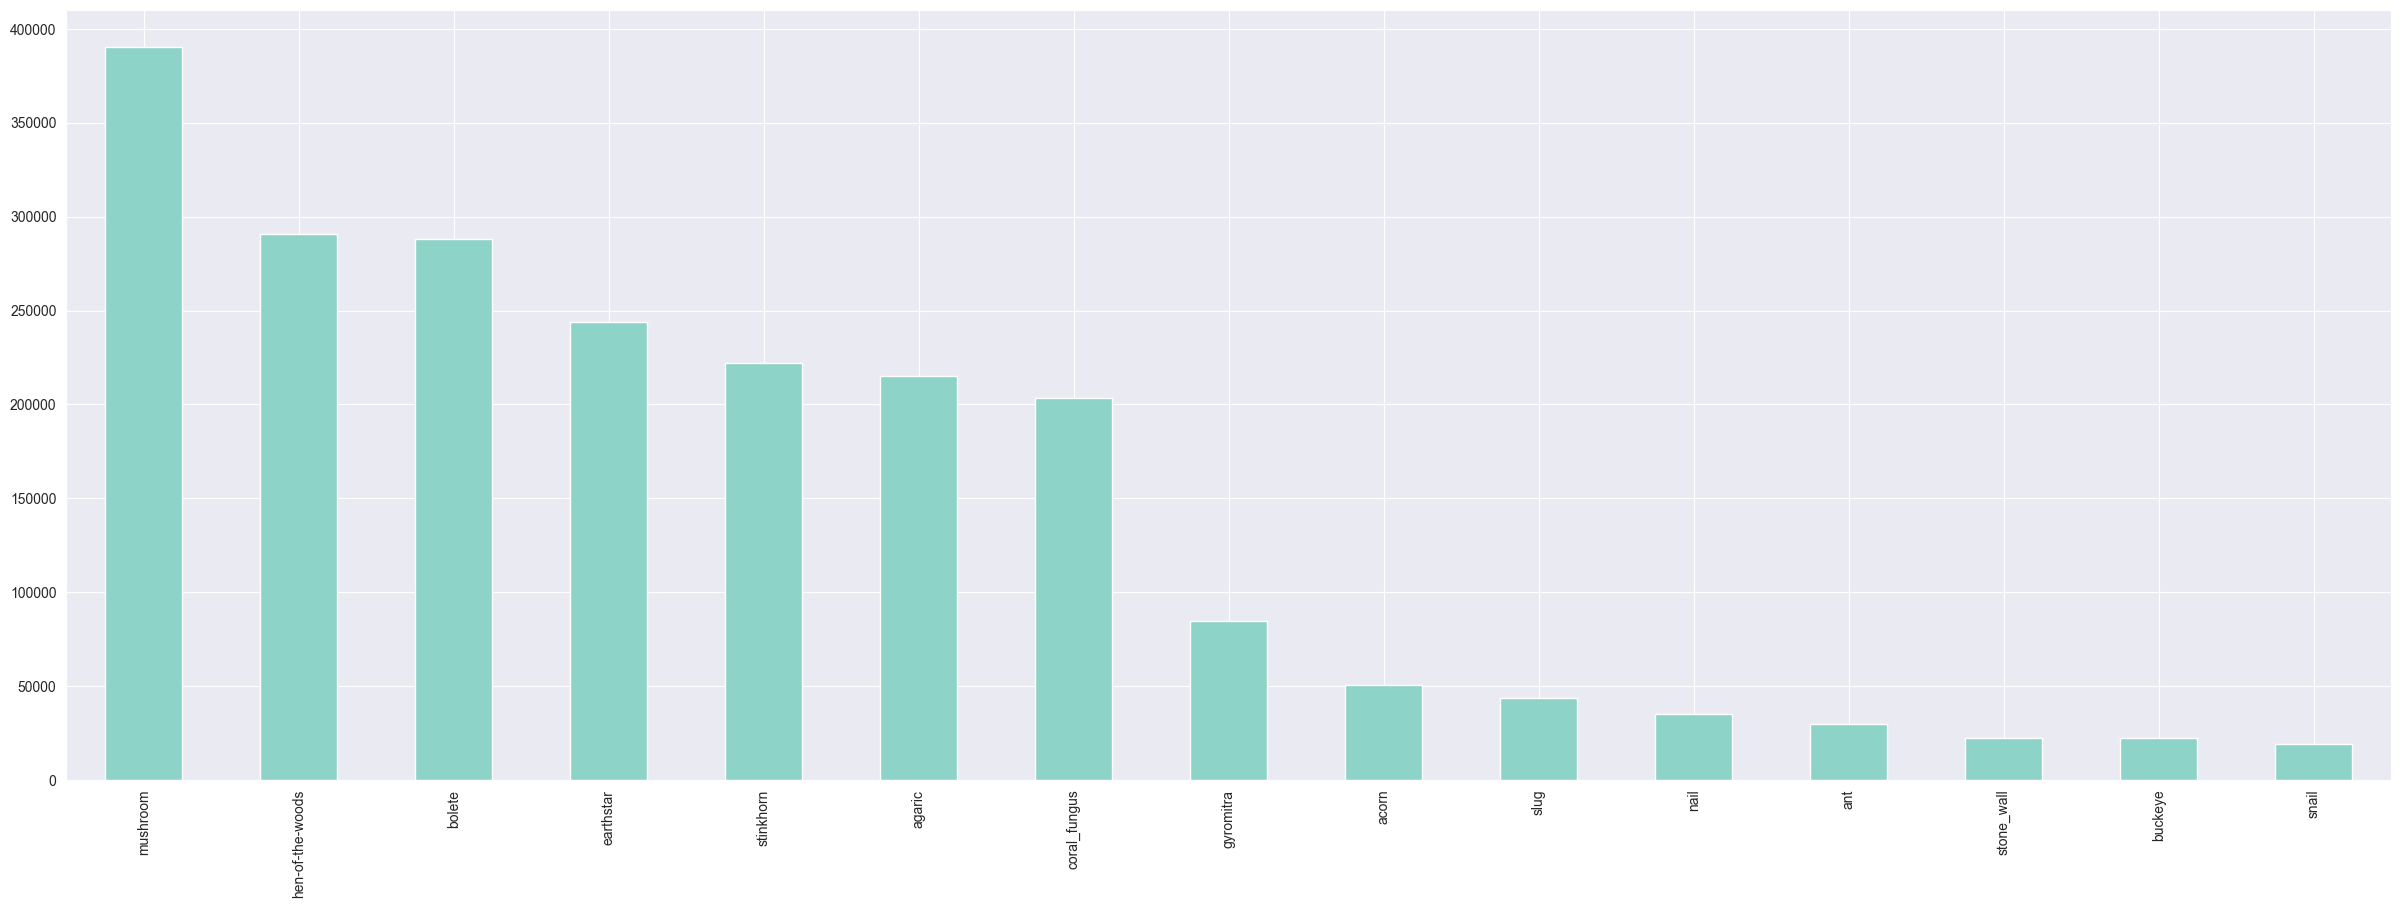

In [20]:
all_categories = list(
    set(
        list(preds[0])
        + list(preds[1])
        + list(preds[2])
        + list(preds[3])
        + list(preds[4])
    )
)
print(f"There are {len(all_categories)} categories in total")

categories = pd.concat([preds[0], preds[1], preds[2], preds[3], preds[4]])
categories.value_counts()[:15].plot(kind="bar", figsize=(30, 10))

We obser that the mayority of categories are words related to Mushrooms, we would like to keep those images and reject images that are not classified as mushrooms.

We will take the first 30 most common categories and make a manual visual inspection to discard images that are not related to mushrooms.

In [22]:
selected_cats = list(preds[0].value_counts()[:30].index)
print(selected_cats)

['mushroom', 'bolete', 'coral_fungus', 'hen-of-the-woods', 'stinkhorn', 'earthstar', 'agaric', 'gyromitra', 'acorn', 'nail', 'slug', 'ant', 'stone_wall', 'chiton', 'honeycomb', 'nematode', 'cliff', 'sea_cucumber', 'rule', 'eft', 'buckeye', 'conch', 'dung_beetle', 'shower_curtain', 'snail', 'hermit_crab', 'dough', 'sea_urchin', 'walking_stick', 'tick']


# Copy images to a new folder so we can observe the clustering

In [25]:
## Code to copy images into its category folders

import os, shutil

mode = 0o755
source_folder = "input/images/"
target_folder = "input/images_labeled_pca_4/"
for i in range(0, n_clusters):
    path = f"{target_folder}{i}"
    if not os.path.exists(path):
        pass
        # os.mkdir(path, mode)

NameError: name 'n_clusters' is not defined

In [23]:
## Code to copy images into its category folders

def copy_images_by_categories(
    df, category, target_folder, source_folder="input/images"
):
    target = df[df[0] == category]

    mode = 0o755
    if not os.path.exists(target_folder):
        os.mkdir(target_folder, mode)

    target_path_folder = f"{target_folder}/{category}"
    mode = 0o755
    if not os.path.exists(target_path_folder):
        os.mkdir(target_path_folder, mode)

    for file in target.image_lien:
        source = f"{source_folder}/{file}"
        dest = f"{target_path_folder}/{file}"
        try:
            if os.path.exists(source) and not os.path.exists(dest):
                shutil.copyfile(source, dest)
        except FileNotFoundError as e:
            pass
            print(e)


for cat in selected_cats:
    #copy_images_by_categories(preds, cat, "input/images_labeled_categories")

SyntaxError: incomplete input (973649413.py, line 27)

After visual inspection we have selected the following categories

In [28]:
manual_categories = [
    "mushroom",
    "bolete",
    "coral_fungus",
    "hen-of-the-woods",
    "stinkhorn",
    "earthstar",
    "agaric",
    "gyromitra",
    "acorn",
    "eft",
    "buckeye",
    "conch",
    "dung_beetle",
    "snail",
    "hermit_crab",
    "dough",
]

Example of images selected

/tmp/ipykernel_15846/3161230125.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


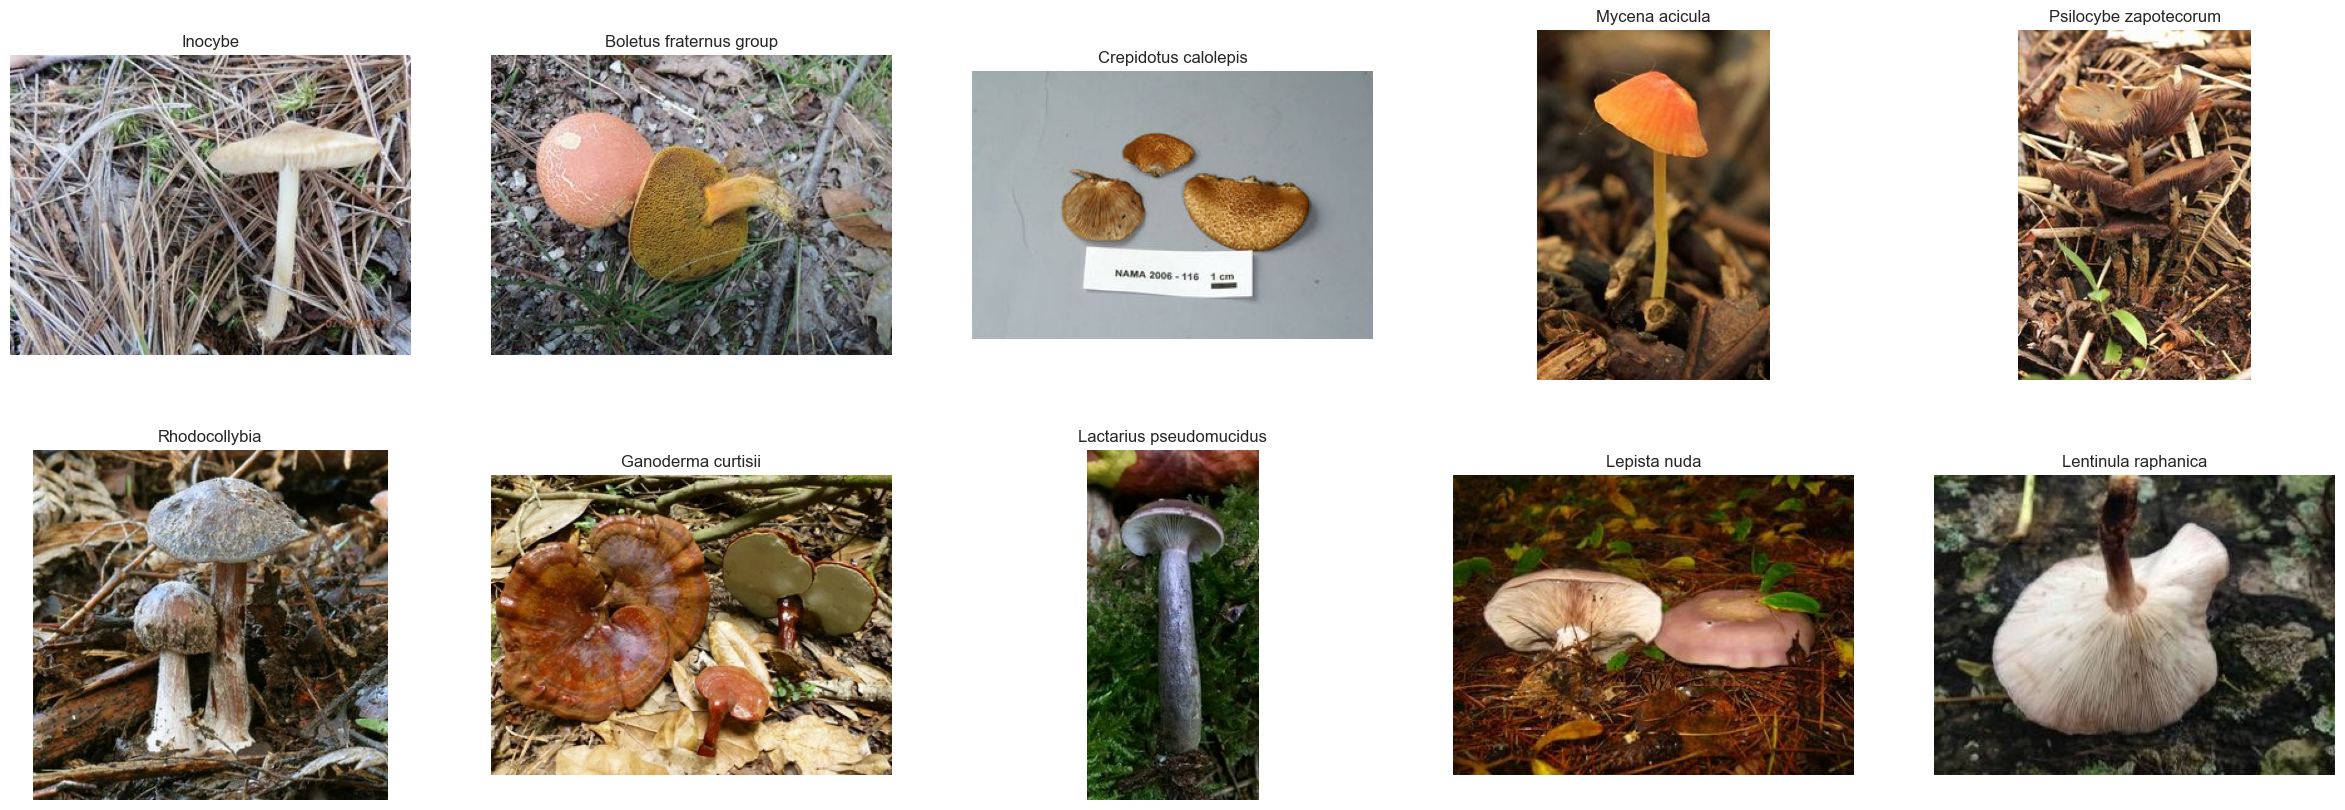

In [58]:
import cv2

fig, axs = plt.subplots(2, 5, figsize=(30, 10))
# fig.title("Image Selection Sample", fontsize=20)
axs = axs.flatten()
j = 0
for i, row in preds[preds[0].isin(manual_categories)].sample(10).iterrows():
    img_bgr = cv2.imread(f"../../input/images/{row.image_lien}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    axs[j].imshow(img_rgb)
    axs[j].set_title(row.label)
    axs[j].axis("off")
    j += 1

fig.show()
fig.savefig("mushrooms_selected_images.jpg", facecolor="white")

Example of images rejected

/tmp/ipykernel_15846/3759421665.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


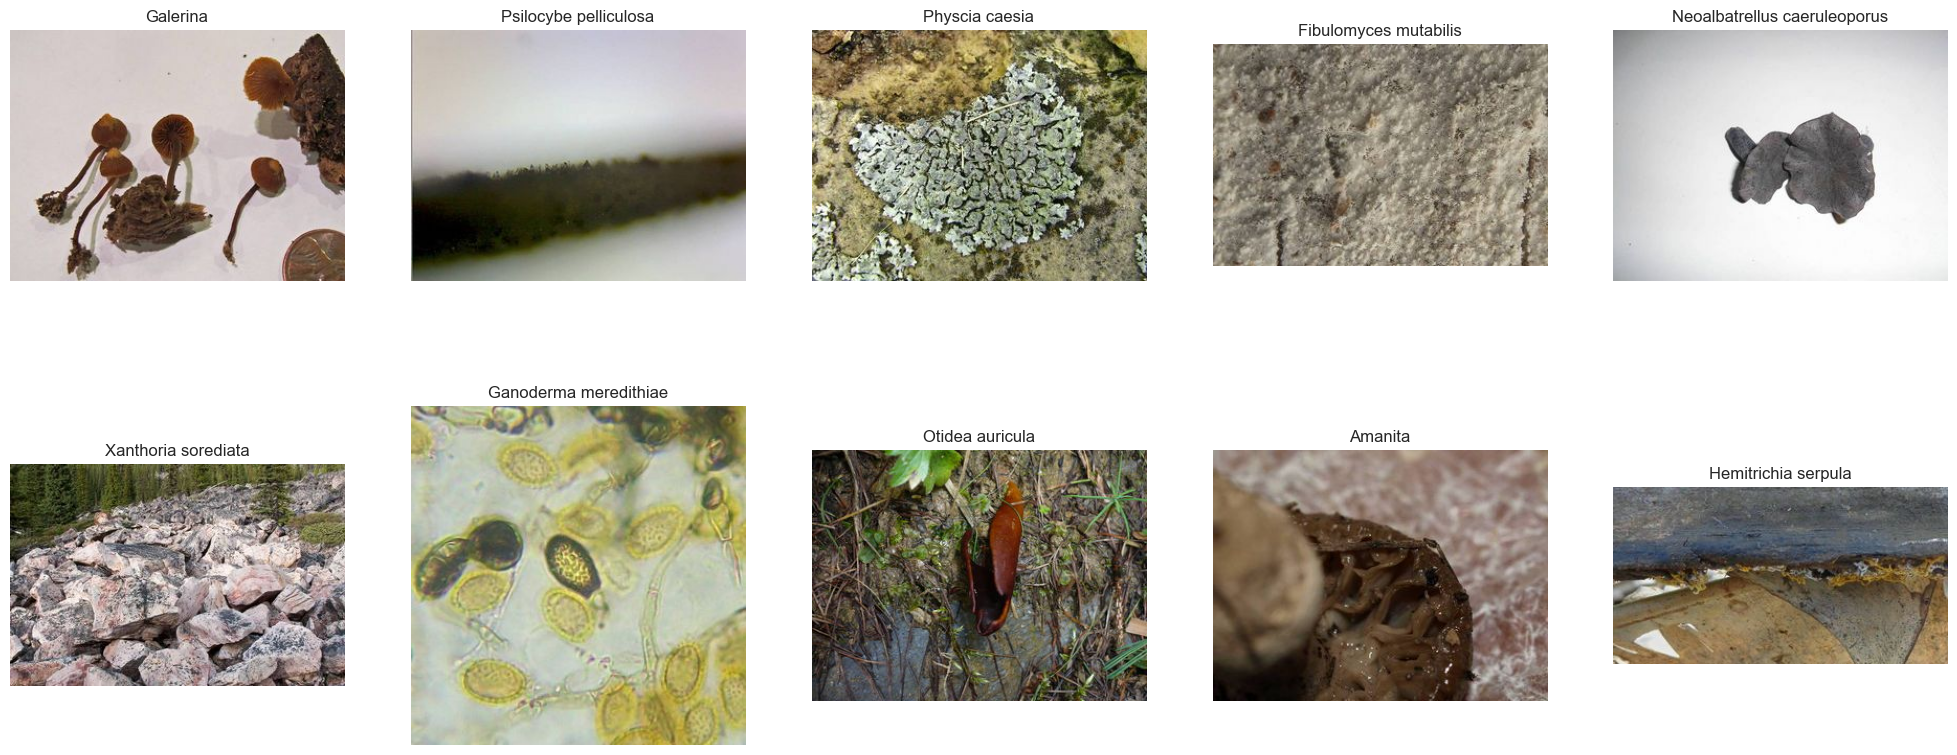

In [57]:
import cv2

reject_catgories = [
    "nail",
    "slug",
    "ant",
    "stone_wall",
    "honeycomb",
    "hermit_crab",
]
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
# fig.title("Image Selection Sample", fontsize=20)
axs = axs.flatten()
j = 0
for i, row in preds[preds[0].isin(reject_catgories)].sample(10).iterrows():
    img_bgr = cv2.imread(f"../../input/images/{row.image_lien}")
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    axs[j].imshow(img_rgb)
    axs[j].set_title(row.label)
    axs[j].axis("off")
    j += 1

fig.show()
fig.savefig("mushrooms_rejected_images.jpg", facecolor="white")

Save selected images into a new csv file.

In [125]:
preds[preds[0].isin(manual_categories)].to_csv(
    "datasets/observations_mushroom_pred_manual_cat_filter.csv"
)

# Psilocybe DataSet

In [54]:
psilocbe = pd.read_csv("datasets/mushrooms_top_15_psilocybe.csv")

# show info
display(psilocbe.shape)

(10121, 38)

In [55]:
print(f"There are {psilocbe.shape[0]} images")
print(f"There are {len(psilocbe.label.unique())} unique labeled images")
print(f"There are {len(psilocbe['gbif_info/genus'].unique())} unique Genus")
print(f"There are {len(psilocbe['gbif_info/species'].unique())} unique Species")

There are 10121 images
There are 49 unique labeled images
There are 1 unique Genus
There are 45 unique Species


In [56]:
top_counts = psilocbe["label"].value_counts().head(20)
print(
    f"There are {psilocbe[psilocbe['label'].isin(top_counts.index)].shape[0]} images in the top 15 species"
)

There are 9000 images in the top 15 species


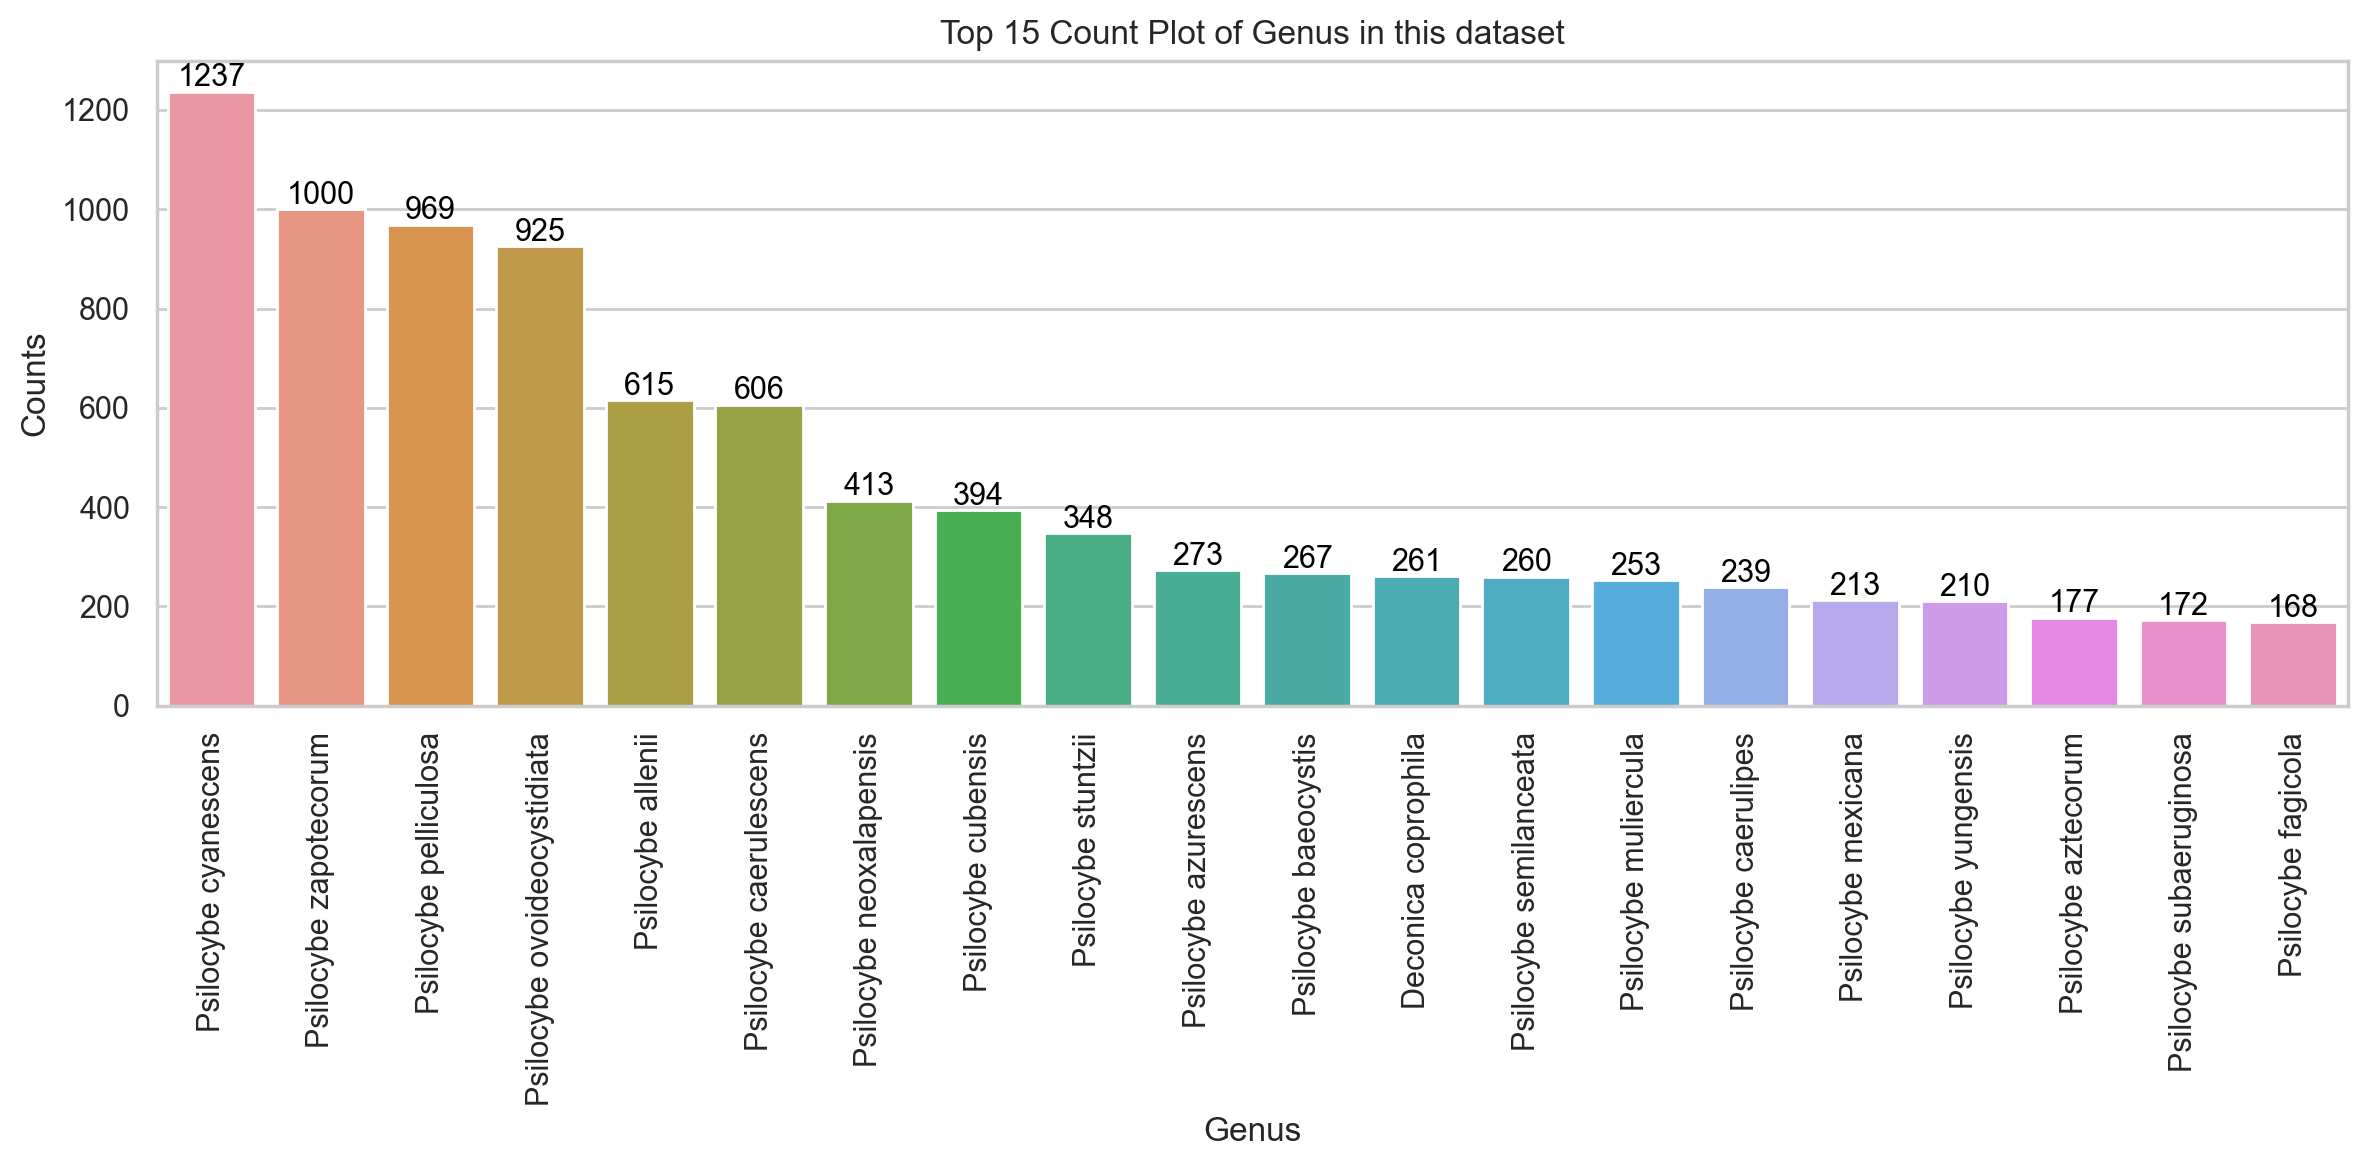

In [57]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the count plot for the top 10 'Name' values
plt.figure(figsize=(12, 6), dpi=200)  # Adjust the figure size if needed
plt.xticks(rotation="vertical")
ax = sns.barplot(x=top_counts.index, y=top_counts.values)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

# Set labels and title
plt.xlabel("Genus")
plt.ylabel("Counts")
plt.title("Top 15 Count Plot of Genus in this dataset")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Filtered Mushroom Observer DataSet

In [61]:
mushrooms = pd.read_csv("datasets/observations_mushroom_pred_manual_cat_filter.csv")

# show info
display(mushrooms.shape)

/tmp/ipykernel_218870/2735467752.py:1: DtypeWarning: Columns (3,6,26,31) have mixed types. Specify dtype option on import or set low_memory=False.
  mushrooms = pd.read_csv("input/observations_mushroom_pred_manual_cat_filter.csv")


(428481, 42)

In [62]:
print(f"There are {mushrooms.shape[0]} images")
print(f"There are {len(mushrooms.label.unique())} unique labeled images")
print(f"There are {len(mushrooms['gbif_info/genus'].unique())} unique Genus")
print(f"There are {len(mushrooms['gbif_info/species'].unique())} unique Species")

There are 428481 images
There are 9805 unique labeled images
There are 1463 unique Genus
There are 7213 unique Species


In [67]:
top_counts = mushrooms["label"].value_counts().head(20)
print(
    f"There are {mushrooms[mushrooms['label'].isin(top_counts.index)].shape[0]} images in the top 15 species"
)

There are 71598 images in the top 15 species


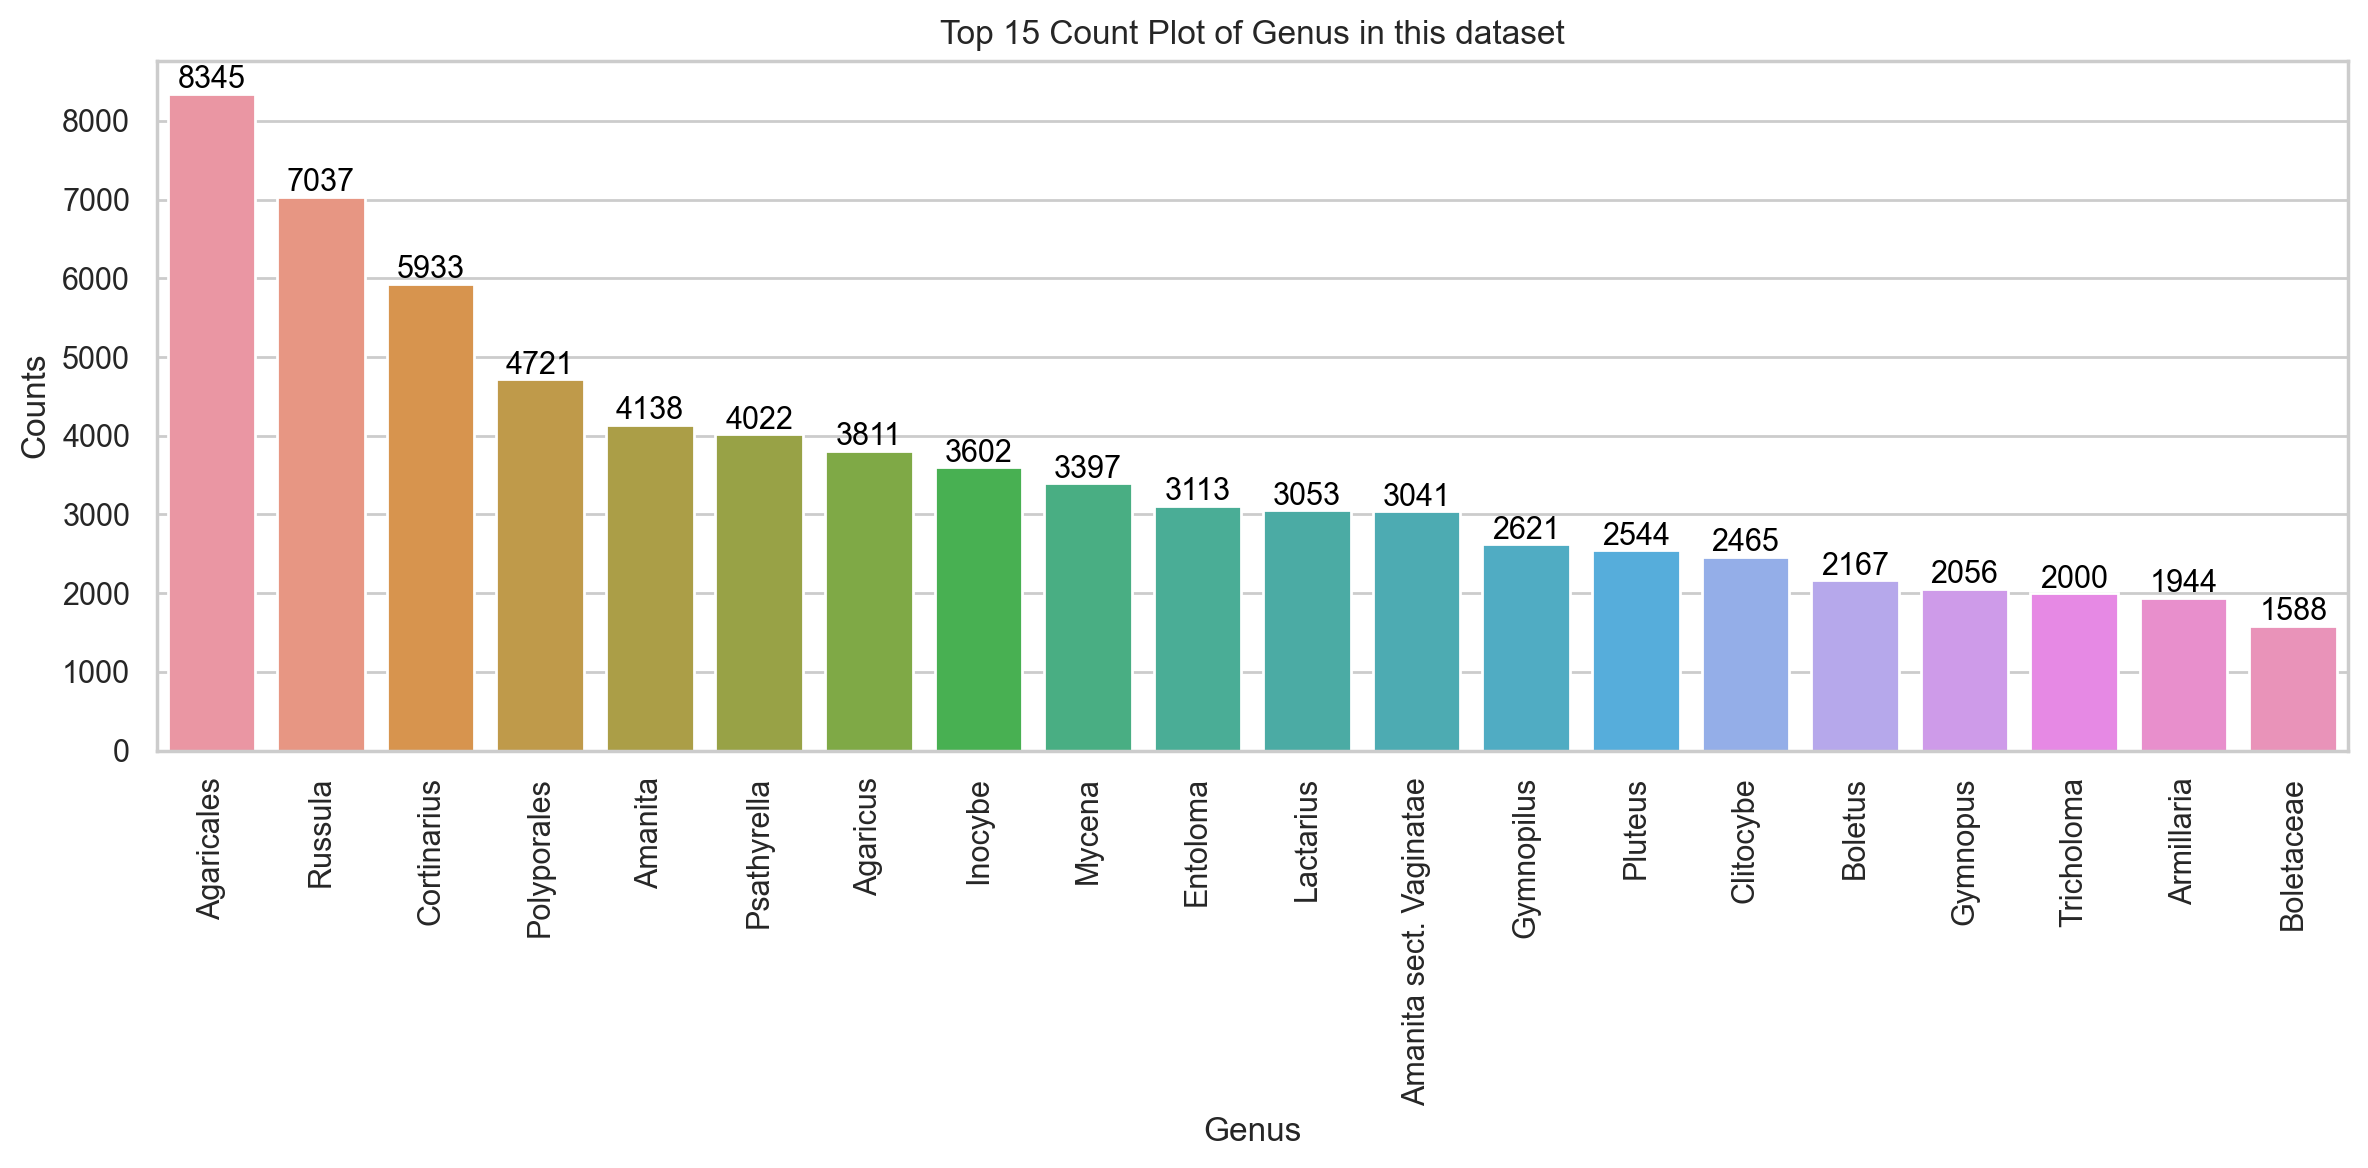

In [68]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the count plot for the top 10 'Name' values
plt.figure(figsize=(12, 6), dpi=200)  # Adjust the figure size if needed
plt.xticks(rotation="vertical")
ax = sns.barplot(x=top_counts.index, y=top_counts.values)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

# Set labels and title
plt.xlabel("Genus")
plt.ylabel("Counts")
plt.title("Top 15 Count Plot of Genus in this dataset")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()